# 8月全球科技热点统计报告
数据来源：全球技术地图

----

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import jieba
import jieba.analyse

jieba.analyse.set_idf_path("./dicts/idf.txt")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

d = pd.read_csv('./1808/8yue_all.csv',sep='|',header=0)

d.describe()

,title,content,field,source,date,content_clean
count,352,352,352,352,352,352
unique,352,352,9,134,32,352
top,明尼苏达大学3D打印出仿生眼睛原型，未来有望恢复盲人视力,据国防科技信息网8月9日消息，美国国家科学院、工程和医学学会计划建造电子-离子对撞机（EIC...,信息,EurekAlert网,8月13日,韩国汉阳大学通过控制电化学界面上的电位，抑制锂离子电池阳极上固体电解质中间相（SEI）膜的形...
freq,1,1,70,29,21,1


In [118]:
field_stat = pd.DataFrame(d['field'].value_counts())
field_stat

,field
信息,70
生物,63
能源,52
科技战略,39
新材料,30
航空,28
海洋,25
航天,24
先进制造,21


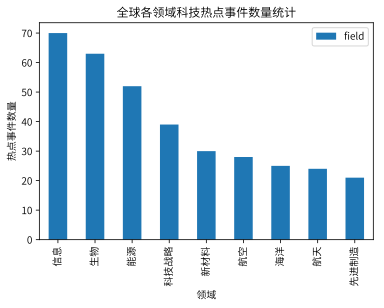

In [119]:
plt.rcParams['font.family'] = ['Source Han Sans CN']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

field_stat.plot(kind = 'bar', colormap='tab20')
plt.xlabel('领域')
plt.ylabel('热点事件数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

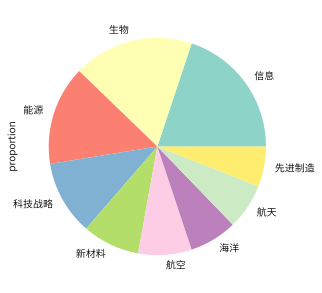

In [120]:
field_stat['proportion'] = field_stat['field'].map(lambda x: x/352)
field_stat
field_stat.plot(y='proportion',kind = 'pie',legend=False,figsize=(5,5),colormap='Set3')
# plt.xlabel('领域')
# plt.ylabel('热点事件数量')
# plt.title('全球各领域科技热点事件数量统计')
plt.show()

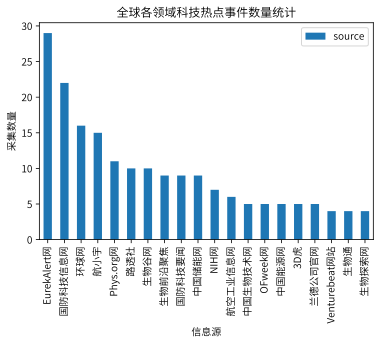

In [121]:
source_stat = pd.DataFrame(d['source'].value_counts())
source_stat[0:20].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

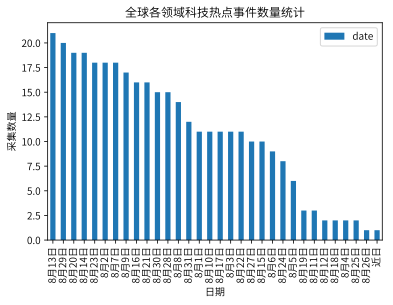

In [122]:
date_stat = pd.DataFrame(d['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

## 1. 信息领域

-------

In [123]:
xx = d[d.field == '信息']
xx.describe()

,title,content,field,source,date,content_clean
count,70,70,70,70,70,70
unique,70,70,1,34,24,70
top,美国会通过法案，强制科技公司披露软件代码被外国政府审查情况,据Eurekalert网站8月20日消息，英国布里斯托大学研制出用于量子信息处理的多用途硅芯...,信息,EurekAlert网,8月7日,华住集团旗下酒店用户信息发生泄露，约1.3亿个人数据在暗网中文论坛被出售，涉及用户姓名、手机...
freq,1,1,70,13,7,1


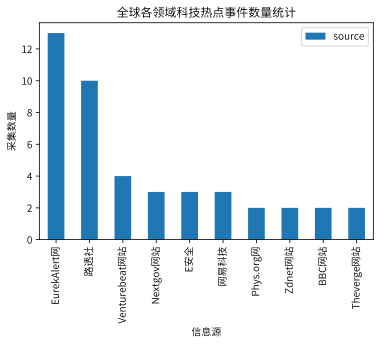

In [124]:
source_stat = pd.DataFrame(xx['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

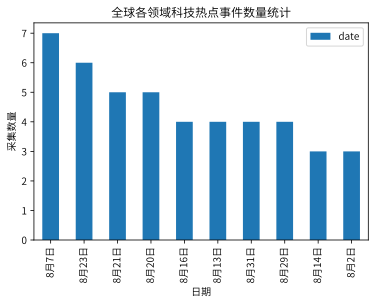

In [125]:
date_stat = pd.DataFrame(xx['date'].value_counts())
date_stat[:10].plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

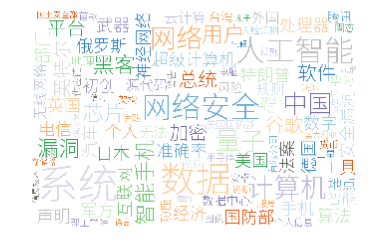

In [174]:
keywords_list = []
for i in xx['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./1.png')

## 2. 生物领域

------

In [169]:
sw = d[d.field == '生物']
sw.describe()

,title,content,field,source,date,content_clean
count,63,63,63,63,63,63
unique,63,63,1,28,26,63
top,美国将向农民提供47亿美元弥补贸易战损失,据生物谷网8月26日消息，美国耶鲁大学等单位研究人员开发出一种氘代谢成像技术（DMI），即利...,生物,生物谷网,8月1日,国家药品审评中心（CDE）发布《关于征求境外已上市临床急需新药名单意见的通知》，列出了Ale...
freq,1,1,63,10,5,1


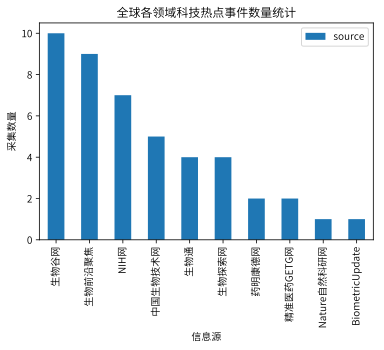

In [170]:
source_stat = pd.DataFrame(sw['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

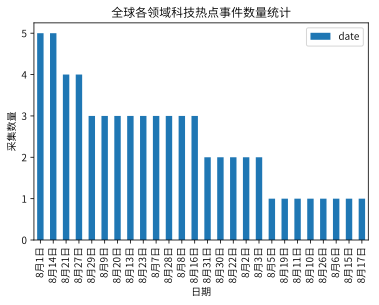

In [171]:
date_stat = pd.DataFrame(sw['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

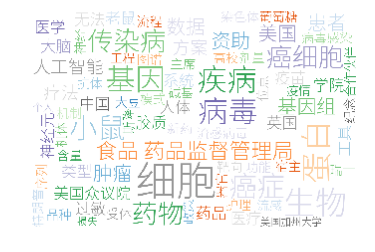

In [173]:
keywords_list = []
for i in sw['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./2.png')

## 3. 能源领域

-------

In [ ]:
ny = d[d.field == '能源']
ny.describe()

In [ ]:
source_stat = pd.DataFrame(ny['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

In [ ]:
date_stat = pd.DataFrame(ny['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

## 4. 科技战略

----------

In [ ]:
kj = d[d.field == '科技战略']
kj.describe()

In [ ]:
source_stat = pd.DataFrame(kj['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

In [ ]:
date_stat = pd.DataFrame(kj['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

## 5. 新材料领域

------

In [ ]:
cl = d[d.field == '新材料']
cl.describe()

In [ ]:
source_stat = pd.DataFrame(cl['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

In [ ]:
date_stat = pd.DataFrame(cl['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()